# Indice
[import datos](#import_datos) <br>
[SentiWordNet English Tweets World](#SentiWordNet_EN) <br>
[SentiWordNet Spanish Tweets World](#SentiWordNet_ES) <br>
[Analisis](#Analisis) <br>

In [3]:
#import gensim.models.wrappers.fasttext
#model = gensim.models.KeyedVectors.load_word2vec_format('../fastext aligned/wiki.en.align.vec', binary=False, encoding='utf8')
#word_vectors = model.wv


In [4]:
#word_vectors.most_similar("cat") 

In [5]:
#from gensim.models.fasttext import load_facebook_vectors

In [6]:
#word_vectors

In [7]:
#model.save('../fastext aligned/bin/wiki.en.align.bin')

In [8]:
#from gensim.models import KeyedVectors
#word_vectors = KeyedVectors.load('../fastext aligned/bin/wiki.en.align.bin', mmap='r')

In [9]:
#word_vectors['cat']

In [10]:
#model_es= gensim.models.KeyedVectors.load_word2vec_format('../fastext aligned/wiki.es.align.vec', binary=False, encoding='utf8')


In [11]:
#model_es.save('../fastext aligned/bin/wiki.es.align.bin')

In [12]:
#from gensim.models import KeyedVectors
#word_vectors2 = KeyedVectors.load('../fastext aligned/bin/wiki.es.align.bin', mmap='r')

In [13]:
#word_vectors2.most_similar(positive=[word_vectors['cat']],topn=1)

# Cargar Binary files

In [14]:
#from gensim.models import KeyedVectors
#word_vectors = KeyedVectors.load('../fastext aligned/bin/wiki.en.align.bin', mmap='r')
#word_vectors2 = KeyedVectors.load('../fastext aligned/bin/wiki.es.align.bin', mmap='r')

# import datos <a id='import_datos'></a>

In [21]:
import pandas as pd

df = pd.read_csv("twits_cop25_results_en_es.csv")

In [22]:
df = df.drop('id', 1)
df = df.drop('created_at', 1)
df = df.drop('geo', 1)
df = df.drop('near', 1)
df = df.drop('source', 1)
df = df.drop('user_rt_id', 1)
df = df.drop('user_rt', 1)       
df = df.drop('retweet_id', 1)
df = df.drop('retweet_date', 1)
df = df.drop('translate', 1)
df = df.drop('trans_src', 1)
df = df.drop('trans_dest', 1)
df = df.drop('quote_url', 1)
df = df.drop('place', 1)
df = df.drop('video', 1)
df = df.drop('username', 1)
df = df.drop('name', 1)
df = df.drop('urls', 1)
df = df.drop('photos', 1)
df = df.drop('replies_count', 1)
df = df.drop('cashtags', 1)
df = df.drop('link', 1)
df = df.drop('retweet', 1)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124524 entries, 0 to 124523
Data columns (total 11 columns):
conversation_id    124524 non-null int64
date               124524 non-null object
time               124524 non-null object
timezone           124524 non-null int64
user_id            124524 non-null int64
tweet              124524 non-null object
mentions           124524 non-null object
retweets_count     124524 non-null int64
likes_count        124524 non-null int64
hashtags           124524 non-null object
reply_to           124524 non-null object
dtypes: int64(5), object(6)
memory usage: 7.6+ MB


In [32]:
df_chile = pd.read_csv("twits_cop25chile_results_en_es.csv")

In [33]:
df_chile = df_chile.drop('id', 1)
df_chile = df_chile.drop('created_at', 1)
df_chile = df_chile.drop('geo', 1)
df_chile = df_chile.drop('near', 1)
df_chile = df_chile.drop('source', 1)
df_chile = df_chile.drop('user_rt_id', 1)
df_chile = df_chile.drop('user_rt', 1)       
df_chile = df_chile.drop('retweet_id', 1)
df_chile = df_chile.drop('retweet_date', 1)
df_chile = df_chile.drop('translate', 1)
df_chile = df_chile.drop('trans_src', 1)
df_chile = df_chile.drop('trans_dest', 1)
df_chile = df_chile.drop('quote_url', 1)
df_chile = df_chile.drop('place', 1)
df_chile = df_chile.drop('video', 1)
df_chile = df_chile.drop('username', 1)
df_chile = df_chile.drop('name', 1)
df_chile = df_chile.drop('urls', 1)
df_chile = df_chile.drop('photos', 1)
df_chile = df_chile.drop('replies_count', 1)
df_chile = df_chile.drop('cashtags', 1)
df_chile = df_chile.drop('link', 1)
df_chile = df_chile.drop('retweet', 1)

In [112]:
df_chile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42105 entries, 0 to 42104
Data columns (total 11 columns):
conversation_id    42105 non-null int64
date               42105 non-null object
time               42105 non-null object
timezone           42105 non-null int64
user_id            42105 non-null int64
tweet              42105 non-null object
mentions           42105 non-null object
retweets_count     42105 non-null int64
likes_count        42105 non-null int64
hashtags           42105 non-null object
reply_to           42105 non-null object
dtypes: int64(5), object(6)
memory usage: 2.6+ MB


In [94]:
lista_tweets = df.tweet
len(lista_tweets)

0        -3
1        -3
2        -3
3        -3
4        -3
         ..
124519   -3
124520   -3
124521   -3
124522   -3
124523   -3
Name: timezone, Length: 124524, dtype: int64

In [8]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 
from cucco import Cucco
import numpy as np
from nltk.stem.wordnet import WordNetLemmatizer

stop_words = stopwords.words('english')
stop_words[:5]
cucco = Cucco()
suma = np.zeros(300)
for i in lista_tweets:
    #i = word_tokenize(i)
    #l = [w for w in i if not w in stop_words]
    l = cucco.normalize(str(i))
    l = word_tokenize(l)
    l = [w for w in l if not w in stop_words]
    print(l)
    for word in l:
        try:
            suma = suma + word_vectors2[word]
        except:
            continue
    print(i)
    #print(word_vectors2.similar_by_vector(suma, topn = 5 , restrict_vocab= None))
    break

['Photograph', 'hellenvanmeene', 'TIME', 'emergenciaclimatica', 'horadeactuar', 'COP25', 'fridaysforfuture', 'climateprotest', 'ClimateEmergency', 'FridaysForFutureSweden', 'globalclimatestrike', 'GlobalWarming', 'GlobalGoals', 'GlobalStrike', 'globalstrikeforfuture', 'pictwittercomjdc9lTGxLL']
Photograph by @hellenvanmeene for TIME -
  #emergenciaclimatica #horadeactuar #COP25 #fridaysforfuture #climateprotest #ClimateEmergency #FridaysForFutureSweden #globalclimatestrike #GlobalWarming #GlobalGoals #GlobalStrike #globalstrikeforfuture pic.twitter.com/jdc9lTGxLL


### SentiWordNet English Tweets World <a id='SentiWordNet_EN'></a>

El siguiente codigo realiza el sentiment analisis con SentiWordNet para el dataset extraido desde twitter con el hastag #Cop25 y en ingles. Para ello lee los tweets almacenados en un archivo .txt generado a partir de los csv donde estaban almacenados los tweets con su metadata.

In [100]:
import csv
import sys
import os
import statistics
import time
from stanfordcorenlp import StanfordCoreNLP
from nltk import tokenize
from nltk.corpus import sentiwordnet as swn
nlp = StanfordCoreNLP('stanford-corenlp-full-2018-10-05')

lista_tweets = df.tweet
tweets_clean = [] #lista de tweets de manera ordenada, sin \n ni espacios reduntantes

for tweet in lista_tweets:
    y = ''
    for i in tweet.strip().split('\n'):
        y += i
    tweets_clean.append(y)

#print(tweets_clean[:5])

def analyzefile(input_tweets, output_dir, out_fileName):
    """
    Performs sentiment analysis on the text file given as input using the ANEW database.
    Outputs results to a new CSV file in output_dir.
    :param input_tweets: list with all the tweets
    :param output_dir: path of directory to create new output file
    :out_fileName: name to the output file
    :return:
    """
    output_file = os.path.join(output_dir, "Output SentiWordNet " + out_fileName + ".csv")

#     # read file into string
#     with open(input_file, 'r', encoding= 'utf-8') as myfile:
#         fulltext = myfile.read()
#     # end method if file is empty
#     if len(fulltext) < 1:
#         print('Empty file.')
#         return

    from nltk.stem.wordnet import WordNetLemmatizer
    lmtzr = WordNetLemmatizer()
    
#     sentences = tokenize.sent_tokenize(fulltext)  # split text into sentences
    i = 1  # to store sentence index

    # check each word in sentence for sentiment and write to output_file
    with open(output_file, 'w', newline='', encoding = 'utf-8') as csvfile:
        fieldnames = ['Sentence ID', 'Sentence', 'Sentiment', 'Sentiment Label', 'date', 'time', 'retweet_count',
                     'likes_count', 'hashtags']
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
        writer.writeheader()

        # analyze each sentence for sentiment
        pos = 0 #posicion del tweet analizado para agregar la metadata correspondiente.
        
        for s in tweets_clean:
            words = nlp.pos_tag(s.lower())
            score_list=[]
            for idx, t in enumerate(words):
                newtag=''
                lemmatized=lmtzr.lemmatize(t[0])
                if t[1].startswith('NN'):
                    newtag='n'
                elif t[1].startswith('JJ'):
                    newtag='a'
                elif t[1].startswith('V'):
                    newtag='v'
                elif t[1].startswith('R'):
                    newtag='r'
                else:
                    newtag='' 
                if(newtag!=''):    
                    synsets = list(swn.senti_synsets(lemmatized, newtag))#conjunto de sinonimos
                    #Getting average of all possible sentiments, as you requested        
                    score=0
                    if(len(synsets)>0):
                        for syn in synsets:
                            score+=syn.pos_score()-syn.neg_score()
                        score_list.append(score/len(synsets))
            try:
                sentiment = statistics.mean(score_list)
            except:
                # write to output CSV
                writer.writerow({'Sentence ID': i,
                                 'Sentence': s,
                                 'Sentiment': "none",
                                 'Sentiment Label': "none",
                                 'date': df.date[pos], 
                                 'time': df.time[pos], 
                                 'retweet_count': df.retweets_count[pos],
                                 'likes_count': df.likes_count[pos], 
                                 'hashtags': df.hashtags[pos]
                                 })
                pos += 1
                continue
            label = 'neutral'
            if sentiment > 0:
                label = 'positive'
            elif sentiment < 0:
                label = 'negative'

            # write to output CSV
            writer.writerow({'Sentence ID': i,
                             'Sentence': s,
                             'Sentiment': sentiment,
                             'Sentiment Label': label,
                             'date': df.date[pos], 
                             'time': df.time[pos], 
                             'retweet_count': df.retweets_count[pos],
                             'likes_count': df.likes_count[pos], 
                             'hashtags': df.hashtags[pos]
                             })
            pos += 1
            i += 1

In [101]:
# analyzefile("tweets_mundo.txt","./")
analyzefile(tweets_clean,"./", "english_test_meta")

In [72]:
len(tweets_clean)

124524

In [64]:
#Respaldo de sentiwordnet...

import csv
import sys
import os
import statistics
import time
from stanfordcorenlp import StanfordCoreNLP
from nltk import tokenize
from nltk.corpus import sentiwordnet as swn
nlp = StanfordCoreNLP('stanford-corenlp-full-2018-10-05')

def analyzefile(input_file, output_dir):
    """
    Performs sentiment analysis on the text file given as input using the ANEW database.
    Outputs results to a new CSV file in output_dir.
    :param input_file: path of .txt file to analyze
    :param output_dir: path of directory to create new output file
    :return:
    """
    output_file = os.path.join(output_dir, "Output SentiWordNet " + os.path.basename(input_file).rstrip('txt') + "csv")

    # read file into string
    with open(input_file, 'r', encoding= 'utf-8') as myfile:
        fulltext = myfile.read()
    # end method if file is empty
    if len(fulltext) < 1:
        print('Empty file.')
        return

    from nltk.stem.wordnet import WordNetLemmatizer
    lmtzr = WordNetLemmatizer()
    
    sentences = tokenize.sent_tokenize(fulltext)  # split text into sentences
    i = 1  # to store sentence index

    # check each word in sentence for sentiment and write to output_file
    with open(output_file, 'w', newline='', encoding = 'utf-8') as csvfile:
        fieldnames = ['Sentence ID', 'Sentence', 'Sentiment', 'Sentiment Label']
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
        writer.writeheader()

        # analyze each sentence for sentiment
        for s in sentences:
            words = nlp.pos_tag(s.lower())
            score_list=[]
            for idx, t in enumerate(words):
                newtag=''
                lemmatized=lmtzr.lemmatize(t[0])
                if t[1].startswith('NN'):
                    newtag='n'
                elif t[1].startswith('JJ'):
                    newtag='a'
                elif t[1].startswith('V'):
                    newtag='v'
                elif t[1].startswith('R'):
                    newtag='r'
                else:
                    newtag='' 
                if(newtag!=''):    
                    synsets = list(swn.senti_synsets(lemmatized, newtag))#conjunto de sinonimos
                    #Getting average of all possible sentiments, as you requested        
                    score=0
                    if(len(synsets)>0):
                        for syn in synsets:
                            score+=syn.pos_score()-syn.neg_score()
                        score_list.append(score/len(synsets))
            try:
                sentiment = statistics.mean(score_list)
            except:
                # write to output CSV
                writer.writerow({'Sentence ID': i,
                                 'Sentence': s,
                                 'Sentiment': "none",
                                 'Sentiment Label': "none",
                                 })
                continue
            label = 'neutral'
            if sentiment > 0:
                label = 'positive'
            elif sentiment < 0:
                label = 'negative'

            # write to output CSV
            writer.writerow({'Sentence ID': i,
                             'Sentence': s,
                             'Sentiment': sentiment,
                             'Sentiment Label': label,
                             })
            i += 1

### SentiWordNet Spanish Tweets World <a id='SentiWordNet_ES'></a>

El siguiente codigo realiza el sentiment analisis con Anew para el dataset extraido desde twitter con el hastag #Cop25Chile y en español. Para ello lee los tweets almacenados en un archivo .txt generado a partir de los csv donde estaban almacenados los tweets con su metadata.

In [102]:
tweets_clean_ch = [] #lista de tweets de manera ordenada, sin \n ni espacios reduntantes

for tweet in df_chile.tweet:
    y = ''
    for i in tweet.strip().split('\n'):
        y += i
    tweets_clean_ch.append(y)

print(tweets_clean_ch[:5])

['Piñera y sus dichos, Patricio Navia, Schmidt y la #COP25, ahora Constanza Santa María y su profundo conocimiento de la realidad francesa... al parecer Chile comienza a liderar la exportación mundial de estupidez.', 'My son, there are laws and when you break them, there are consequences.#Barroso #Montalegre #Science #water #ClimateChange #COP25 #EUCommission #UnitedNations #UNESCO #FAO #ActOnClimate #Chile #Bolivia #Argentina #Brazil #Tibet #Namibia #Zimbabwe #Congo #Portugal #Australia', 'En este #Ecocampus recordamos capítulos anteriores grabados en la #COP25 para hablar enlazar el pasado, presente y futuro de #Chile, gracias a Vicente Pizarro, a quién podréis conocer en esta entrevista que realiza Moisés Palmero @GRANSEISMO🎙️👉🏼 https://www.ivoox.com/47193128\xa0 pic.twitter.com/t3OPa6eCwm', 'Luego de la #COP25 Chile-Madrid, en noviembre llegará un nuevo capítulo de negociaciones en #cambioclimático en tiempos de crisis sociales y crisis del multilateralismo: #COP26 en Glasgow post-

In [125]:
from nltk.corpus import stopwords
stops = set(stopwords.words("spanish"))
anew = "tools/Spanish_Redondo.csv"

def analyzefile_esp(input_tweets, output_dir, mode, out_fileName):
    """
    Performs sentiment analysis on the text file given as input using the ANEW database.
    Outputs results to a new CSV file in output_dir.
    :param input_tweets: lista con los tweets a analizar
    :param output_dir: path of directory to create new output file
    :param mode: determines how sentiment values for a sentence are computed (median or mean)
    :out_fileName: nombre del archivo final
    :return:
    """
    output_file = os.path.join(output_dir, "Output Anew Sentiment " + out_fileName + ".csv")

#     # read file into string
#     with open(input_file, 'r', encoding = "utf-8") as myfile:
#         fulltext = myfile.read()
#     # end method if file is empty
#     if len(fulltext) < 1:
#         print('Empty file.')
#         return

    from nltk.stem import SnowballStemmer
    stemmer = SnowballStemmer('spanish')
#     sentences = tokenize.sent_tokenize(fulltext)
    i = 1 # to store sentence index
    # check each word in sentence for sentiment and write to output_file
    with open(output_file, 'w', encoding = 'utf-8') as csvfile:
        fieldnames = ['Sentence ID', 'Sentence', 'Sentiment', 'Sentiment Label', 'Arousal', 'Dominance',
                      '# Words Found', 'Found Words', 'All Words', 'date', 'time', 'retweet_count',
                     'likes_count', 'hashtags']
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
        writer.writeheader()
        
        twt = 0 #contador de tweets para hacer calsar la meta data del df.
        
        # analyze each sentence for sentiment
        for s in input_tweets:
            # print("S" + str(i) +": " + s)
            all_words = []
            found_words = []
            total_words = 0
            v_list = []  # holds valence scores
            a_list = []  # holds arousal scores
            d_list = []  # holds dominance scores

            # search for each valid word's sentiment in ANEW
            try:
                words = nlp.pos_tag(s.lower())
            except:
                pos += 1
                continue
            for index, p in enumerate(words):
                # don't process stops or words w/ punctuation
                w = p[0]
                pos = p[1]
                if w in stops or not w.isalpha(): # check this!
                    continue

                # check for negation in 3 words before current word
                j = index-1
                neg = False
                lemma = w
                while j >= 0 and j >= index-3:
                    if words[j][0] == 'no':
                        neg = True
                        break
                    j -= 1

                    lemma = stemmer.stem(w)

                all_words.append(lemma.casefold())

                # search for lemmatized word in ANEW
                with open(anew) as csvfile:
                    reader = csv.DictReader(csvfile)
                    for row in reader:
                        anew_lemma = stemmer.stem(row['Word'].casefold())
                        if anew_lemma == lemma:
                            if neg:
                                found_words.append("neg-"+lemma)
                            else:
                                found_words.append(lemma)
                            v = float(row['valence'])
                            a = float(row['arousal'])
                            d = float(row['dominance'])

                            if neg:
                                # reverse polarity for this word
                                v = 5 - (v - 5)
                                a = 5 - (a - 5)
                                d = 5 - (d - 5)

                            v_list.append(v)
                            a_list.append(a)
                            d_list.append(d)

            if len(found_words) == 0:  # no words found in ANEW for this sentence
                writer.writerow({'Sentence ID': i,
                                 'Sentence': s,
                                 'Sentiment': 'N/A',
                                 'Sentiment Label': 'N/A',
                                 'Arousal': 'N/A',
                                 'Dominance': 'N/A',
                                 '# Words Found': 0,
                                 'Found Words': 'N/A',
                                 'All Words': all_words,
                                 'date': df_chile.date[twt], 
                                 'time': df_chile.time[twt], 
                                 'retweet_count': df_chile.retweets_count[twt],
                                 'likes_count': df_chile.likes_count[twt], 
                                 'hashtags': df_chile.hashtags[twt]
                                 })
                twt += 1
                i += 1
            else:  # output sentiment info for this sentence

                # get values
                if mode == 'median':
                    sentiment = statistics.median(v_list)
                    arousal = statistics.median(a_list)
                    dominance = statistics.median(d_list)
                else:
                    sentiment = statistics.mean(v_list)
                    arousal = statistics.mean(a_list)
                    dominance = statistics.mean(d_list)

                # set sentiment label
                label = 'neutral'
                if sentiment > 6:
                    label = 'positive'
                elif sentiment < 4:
                    label = 'negative'

                writer.writerow({'Sentence ID': i,
                                 'Sentence': s,
                                 'Sentiment': sentiment,
                                 'Sentiment Label': label,
                                 'Arousal': arousal,
                                 'Dominance': dominance,
                                 '# Words Found': ("%d out of %d" % (len(found_words), len(all_words))),
                                 'Found Words': found_words,
                                 'All Words': all_words,
                                 'date': df_chile.date[twt], 
                                 'time': df_chile.time[twt], 
                                 'retweet_count': df_chile.retweets_count[twt],
                                 'likes_count': df_chile.likes_count[twt], 
                                 'hashtags': df_chile.hashtags[twt]
                                 })
                twt += 1
                i += 1
                

In [127]:
# analyzefile_esp("tweets_chile.txt", "./","mean")
analyzefile_esp(tweets_clean_ch, "./","mean", "español_test")

In [ ]:
# Respaldo anew...

from nltk.corpus import stopwords
stops = set(stopwords.words("spanish"))
anew = "tools/Spanish_Redondo.csv"

def analyzefile_esp(input_file, output_dir, mode):
    """
    Performs sentiment analysis on the text file given as input using the ANEW database.
    Outputs results to a new CSV file in output_dir.
    :param input_file: path of .txt file to analyze
    :param output_dir: path of directory to create new output file
    :param mode: determines how sentiment values for a sentence are computed (median or mean)
    :return:
    """
    output_file = os.path.join(output_dir, "Output Anew Sentiment " + os.path.basename(input_file).rstrip('txt') + "csv")

    # read file into string
    with open(input_file, 'r', encoding = "utf-8") as myfile:
        fulltext = myfile.read()
    # end method if file is empty
    if len(fulltext) < 1:
        print('Empty file.')
        return

    from nltk.stem import SnowballStemmer
    stemmer = SnowballStemmer('spanish')
    sentences = tokenize.sent_tokenize(fulltext)
    i = 1 # to store sentence index
    # check each word in sentence for sentiment and write to output_file
    with open(output_file, 'w', encoding = 'utf-8') as csvfile:
        fieldnames = ['Sentence ID', 'Sentence', 'Sentiment', 'Sentiment Label', 'Arousal', 'Dominance',
                      '# Words Found', 'Found Words', 'All Words']
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
        writer.writeheader()

        # analyze each sentence for sentiment
        for s in sentences:
            # print("S" + str(i) +": " + s)
            all_words = []
            found_words = []
            total_words = 0
            v_list = []  # holds valence scores
            a_list = []  # holds arousal scores
            d_list = []  # holds dominance scores

            # search for each valid word's sentiment in ANEW
            try:
                words = nlp.pos_tag(s.lower())
            except:
                continue
            for index, p in enumerate(words):
                # don't process stops or words w/ punctuation
                w = p[0]
                pos = p[1]
                if w in stops or not w.isalpha(): # check this!
                    continue

                # check for negation in 3 words before current word
                j = index-1
                neg = False
                lemma = w
                while j >= 0 and j >= index-3:
                    if words[j][0] == 'no':
                        neg = True
                        break
                    j -= 1

                    lemma = stemmer.stem(w)

                all_words.append(lemma.casefold())

                # search for lemmatized word in ANEW
                with open(anew) as csvfile:
                    reader = csv.DictReader(csvfile)
                    for row in reader:
                        anew_lemma = stemmer.stem(row['Word'].casefold())
                        if anew_lemma == lemma:
                            if neg:
                                found_words.append("neg-"+lemma)
                            else:
                                found_words.append(lemma)
                            v = float(row['valence'])
                            a = float(row['arousal'])
                            d = float(row['dominance'])

                            if neg:
                                # reverse polarity for this word
                                v = 5 - (v - 5)
                                a = 5 - (a - 5)
                                d = 5 - (d - 5)

                            v_list.append(v)
                            a_list.append(a)
                            d_list.append(d)

            if len(found_words) == 0:  # no words found in ANEW for this sentence
                writer.writerow({'Sentence ID': i,
                                 'Sentence': s,
                                 'Sentiment': 'N/A',
                                 'Sentiment Label': 'N/A',
                                 'Arousal': 'N/A',
                                 'Dominance': 'N/A',
                                 '# Words Found': 0,
                                 'Found Words': 'N/A',
                                 'All Words': all_words
                                 })
                i += 1
            else:  # output sentiment info for this sentence

                # get values
                if mode == 'median':
                    sentiment = statistics.median(v_list)
                    arousal = statistics.median(a_list)
                    dominance = statistics.median(d_list)
                else:
                    sentiment = statistics.mean(v_list)
                    arousal = statistics.mean(a_list)
                    dominance = statistics.mean(d_list)

                # set sentiment label
                label = 'neutral'
                if sentiment > 6:
                    label = 'positive'
                elif sentiment < 4:
                    label = 'negative'

                writer.writerow({'Sentence ID': i,
                                 'Sentence': s,
                                 'Sentiment': sentiment,
                                 'Sentiment Label': label,
                                 'Arousal': arousal,
                                 'Dominance': dominance,
                                 '# Words Found': ("%d out of %d" % (len(found_words), len(all_words))),
                                 'Found Words': found_words,
                                 'All Words': all_words
                                 })
                i += 1

# Carga de datos con sentiment ya procesado <a id='Analisis'></a>

In [14]:
import pandas as pd
df_sent_en = pd.read_csv("Output SentiWordNet english_test_meta.csv",encoding = "utf-8")
df_sent_es = pd.read_csv("Output Anew Sentiment español_test.csv",encoding = "utf-8")

In [3]:
df_sent_es.head(10)

,Sentence ID,Sentence,Sentiment,Sentiment Label,Arousal,Dominance,# Words Found,Found Words,All Words,date,time,retweet_count,likes_count,hashtags
0,1,"Piñera y sus dichos, Patricio Navia, Schmidt y...",5.3275,neutral,5.1725,4.7925,4 out of 20,"['dich', 'sant', 'mar', 'conoc']","['piñera', 'dich', 'patrici', 'navi', 'schmidt...",2020-01-31,20:14:30,0,9,['#cop25']
1,2,"My son, there are laws and when you break them...",NaN,NaN,NaN,NaN,0,NaN,"['my', 'ther', 'are', 'laws', 'and', 'when', '...",2020-01-31,16:53:44,0,0,"['#barroso', '#montalegre', '#science', '#wate..."
2,3,En este #Ecocampus recordamos capítulos anteri...,4.8200,neutral,5.7250,5.6950,2 out of 19,"['podr', 'conoc']","['record', 'capitul', 'anterior', 'grab', 'hab...",2020-01-31,10:14:13,2,5,"['#ecocampus', '#cop25', '#chile']"
3,4,"Luego de la #COP25 Chile-Madrid, en noviembre ...",3.0100,negative,6.1100,3.1400,3 out of 15,"['tiemp', 'crisis', 'crisis']","['luego', 'noviembr', 'lleg', 'nuev', 'capitul...",2020-01-31,08:48:36,1,8,"['#cop25', '#cambioclimático', '#cop26']"
4,5,Saca la foto de la cop25 porque fue un fraude ...,1.8600,negative,5.8200,3.2900,1 out of 6,['fraud'],"['saca', 'fot', 'fraud', 'chil', 'da', 'vergue...",2020-01-31,02:06:59,0,0,[]
5,6,"Nada resulta con Piñera ni la COP25, ni el fut...",NaN,NaN,NaN,NaN,0,NaN,"['result', 'piñer', 'futbol', 'sub', 'tampoc',...",2020-01-31,00:41:21,0,0,[]
6,7,COP25: lecciones para Chile tras el triunfo de...,7.8900,positive,7.0300,5.9600,1 out of 5,['triunf'],"['leccion', 'chil', 'tras', 'triunf', 'siempr']",2020-01-30,19:48:58,0,0,[]
7,8,Does BCH4 stands for Biomethane?Some of you sa...,NaN,NaN,NaN,NaN,0,NaN,"['does', 'stands', 'for', 'of', 'you', 'say', ...",2020-01-30,18:25:42,0,0,"['#science', '#climatechange', '#barroso', '#m..."
8,9,"""No biased algorithm will save your asses down...",2.0250,negative,6.5800,3.6500,2 out of 13,"['her', 'her']","['biased', 'algorithm', 'will', 'sav', 'your',...",2020-01-30,17:49:46,1,0,"['#science', '#climatechange', '#barroso', '#m..."
9,10,Nuestro capellán se reunió con el líder de la ...,NaN,NaN,NaN,NaN,0,NaN,"['capellan', 'reun', 'lid', 'gonzal', 'muñoz',...",2020-01-30,15:39:54,1,4,"['#cop25', '#madrid', '#hogardetodos', '#suste..."


In [15]:
#pd.to_numeric(df_sent_en.Sentiment)
df_sent_en.loc[df_sent_en['Sentiment'] == "none"]
df_sent_en = df_sent_en.drop(df_sent_en.loc[df_sent_en['Sentiment'] == "none"].index)
df_sent_en = df_sent_en.astype({'Sentiment': 'float64'})

In [16]:
import datetime
df_sent_es.index = pd.to_datetime(df_sent_es['date'],format='%Y-%m-%d')
by_fecha_es = df_sent_es.groupby(by=[df_sent_es.index.month, df_sent_es.index.year])


In [17]:
keys = by_fecha_es.groups.keys()
sentimientos_es = []
for i in keys:
    promedios = by_fecha_es.get_group(i).mean()
    
    sentimientos_es.append(promedios.Sentiment)
    
sentimientos_es
#by_fecha_es = df_sent_es.groupby("date")
#by_fecha_en = df_sent_en.groupby("date")

[6.02851931567329,
 5.670909822375291,
 5.618931953463204,
 6.128668054424051,
 5.920438625524948,
 5.67222721874638,
 5.745030686737504,
 5.5969996468303025,
 5.6316261008082,
 5.810255273284221,
 5.47521971110436,
 6.129459263514481,
 5.454804172051469]

In [53]:
fechas_en = by_fecha_en["Año-Mes"].unique()
sentimientos_en = []
#arousals_en = []  Senti word net no entrega arousal ni dominance
#dominances_en = []
for i in fechas_en:
    promedios = by_fecha_en.get_group(i[0]).describe().Sentiment[1]
    
    sentimientos_en.append(promedios)
    #arousals_en.append(promedios.Arousal)
    #dominances_en.append(promedios.Dominance)

In [65]:
fechas_def_en = []
for fecha in fechas_en:
    fechas_def_en.append(fecha[0])


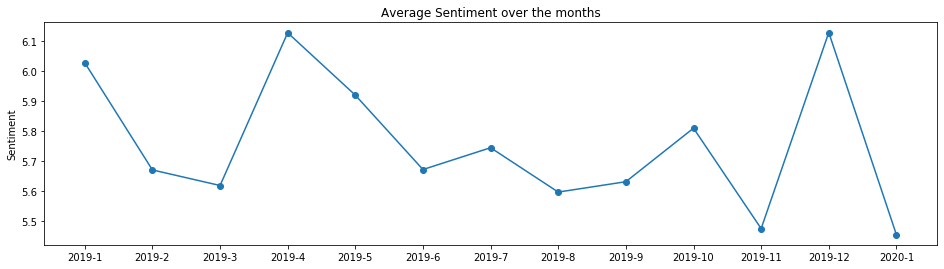

In [21]:
import matplotlib.pyplot as plt

fechas = []
aux_list = []

for month, year in keys:
    aux_list.append((year, month))
    
aux_list.sort()
for month, year in aux_list:
    fechas.append(str(month) + "-" + str(year))

x1 = fechas

y1 = sentimientos_es


plt.figure(figsize=(16,9))
plt.subplot(2, 1, 1)
plt.plot(x1, y1, 'o-')
plt.title('Average Sentiment over the months')
plt.ylabel('Sentiment')

plt.show()

ValueError: setting an array element with a sequence.

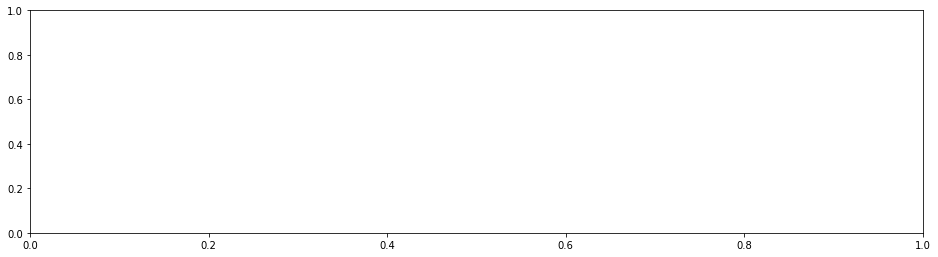

In [54]:

x2 = fechas_en


y2 = sentimientos_en

plt.figure(figsize=(16,9))
plt.subplot(2, 1, 1)
plt.plot(x2, y2, 'o-')
plt.title('A tale of 2 subplots')
plt.ylabel('Damped oscillation')

plt.show()